# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following linesи

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [26]:
pip install scikit-learn==1.3.2


   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/9.2 MB 1.7 MB/s eta 0:00:06
   - -------------------------------------- 0.3/9.2 MB 2.6 MB/s eta 0:00:04
   -- ------------------------------------- 0.6/9.2 MB 4.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.0/9.2 MB 5.6 MB/s eta 0:00:02
   ------ --------------------------------- 1.5/9.2 MB 6.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.2/9.2 MB 7.7 MB/s eta 0:00:01
   ----------- ---------------------------- 2.7/9.2 MB 8.2 MB/s eta 0:00:01
   -------------- ------------------------- 3.3/9.2 MB 8.7 MB/s eta 0:00:01
   ---------------- ----------------------- 3.8/9.2 MB 9.0 MB/s eta 0:00:01
   ------------------ --------------------- 4.3/9.2 MB 9.2 MB/s eta 0:00:01
   --------------------- ------------------ 4.9/9.2 MB 9.5 MB/s eta 0:00:01
   ----------------------- ---------------- 5.4/9.2 MB 9.6 MB/s eta 0:00:01
   ----------------

  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.
  You can safely remove it manually.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [4]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,167,110,51,104,191,57,12,213,31,24,162,226,674,190,68,18,2,191,199
1,785,85,43,66,123,56,6,148,46,19,145,166,319,171,85,6,11,179,182
2,430,104,53,108,206,61,11,217,31,24,168,226,694,209,67,0,9,188,201
3,809,79,38,55,120,55,5,142,48,19,128,153,295,145,81,4,2,180,183
4,636,96,41,69,153,56,7,141,47,18,141,162,297,169,61,11,8,202,209
5,814,85,43,66,123,55,7,150,45,19,146,172,326,173,83,4,15,180,183
6,36,82,44,72,118,52,7,152,44,19,147,174,340,177,82,2,2,180,185
7,789,90,39,85,160,59,7,163,41,20,131,189,396,158,71,7,13,186,192
8,360,108,52,109,182,55,12,216,31,24,171,229,687,214,72,10,28,189,201
9,70,96,55,98,161,54,10,215,31,24,175,226,683,221,76,3,6,185,193


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.812386,93.435337,44.974499,82.107468,168.690346,61.743169,8.602914,168.473588,40.943534,20.533698,148.264117,188.225865,437.265938,174.965392,72.515483,6.142077,12.316940,188.834244,195.595628
std,247.906871,8.224602,6.072200,15.496330,33.461530,8.021730,4.718622,32.301580,7.631720,2.509335,14.431610,30.398269,170.909414,31.386580,7.628356,4.900640,8.685382,6.243817,7.373783
min,2.000000,73.000000,33.000000,44.000000,104.000000,47.000000,2.000000,115.000000,26.000000,17.000000,118.000000,135.000000,193.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,204.000000,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.000000,33.000000,19.000000,138.000000,167.000000,317.000000,152.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,415.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,634.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,197.000000,46.000000,23.000000,160.000000,216.000000,578.000000,197.000000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,261.000000,59.000000,28.000000,188.000000,320.000000,998.000000,264.000000,135.000000,22.000000,39.000000,206.000000,211.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Проверка на пропущенные значения

In [5]:
print(f'Общее число: {np.isnan(data).sum()} и в каждом столбце:')
print(np.isnan(data).sum(axis=0))

Общее число: 0 и в каждом столбце:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Пропущенных значений нет!

Теперь нужно проанализировать сами данные. Это можно сделать и по табличке от `describe()`, но с графиками будет понятней

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: >]], dtype=object)

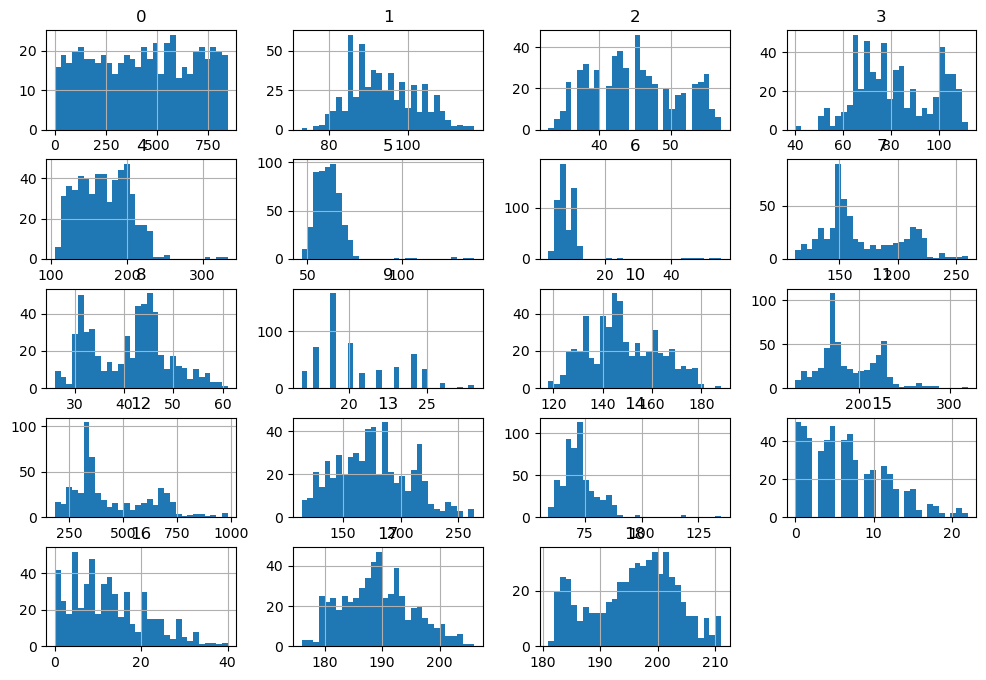

In [10]:
import matplotlib.pyplot as plt

X_train_pd.hist(figsize=(12, 8), bins=30)

Я вижу здесь картину так:
Один график (0) будто равномерный
Два графика (15б 16) похожи на экспоненциальное распределение
А все остальные так или начи схожи с нормальным распределением, где-то со смещениями, где-то с выбросами

Т.к. большинство подходят под нормалоное распределение, `StandardScaler` должен справиться с этим

In [5]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

1. Нам предложенно найти геперпараметры логистической регресии сиспользованием кросс-валидации. Нам предлагаются варианты - Грид или Рандом серч. Т.к. в нашем случае данных не очень много, то мы вполне можем воспользоваться гридСерчем для более точного опредления гиперпаметров. Будем использовать встроенный в `sklearn`
2. Для рассчета метрик также воспользуемся встроенными функциями `sklearn.metrics`

In [6]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

prms_grid = {
    'C' : np.logspace(-4,1,6)
}

logreg = LogisticRegression(multi_class='multinomial',
                           solver='saga',
                           tol=1e-3,
                           max_iter=500)

grid_search = GridSearchCV(logreg, prms_grid, cv=5)

grid_search.fit(X_train_std, y_train)

logreg = grid_search.best_estimator_

best_params_for_logreg = logreg.get_params()
best_params_for_logreg

{'C': 10.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 500,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'saga',
 'tol': 0.001,
 'verbose': 0,
 'warm_start': False}

In [7]:
from sklearn.metrics import f1_score, accuracy_score

y_pred = logreg.predict(X_test_std)

print(f"accurac {accuracy_score(y_test, y_pred)}")
print(f"f1 {f1_score(y_test, y_pred, average='weighted')}")

accurac 0.7845117845117845
f1 0.7823585335525327


получили хорошие значения

In [10]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead
# все равно установим через юпитер

!pip install scipy==1.9.3

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

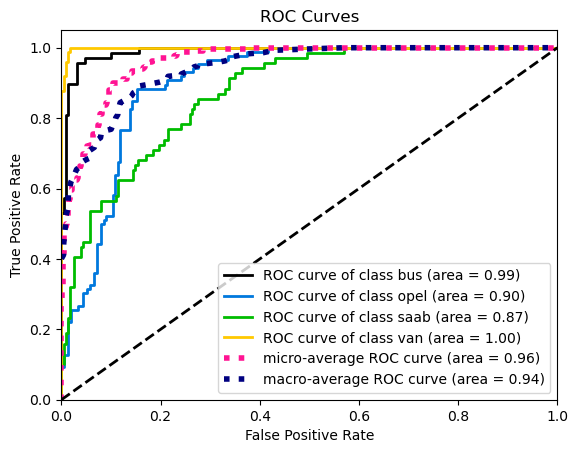

In [20]:
import scikitplot
from sklearn.metrics import roc_auc_score

predicted_proba = logreg.predict_proba(X_test_std)

scikitplot.metrics.plot_roc(y_test, predicted_proba)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

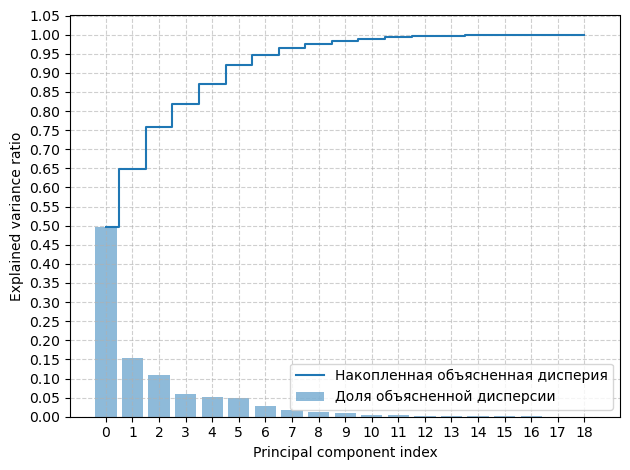

In [11]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)

exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Доля объясненной дисперсии')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Накопленная объясненная дисперия')

plt.xticks(np.arange(0, len(exp_var_pca), step=1)) 
plt.yticks(np.arange(0, 1.1, step=0.05))

plt.grid(True, linestyle='--', alpha=0.6)

plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')

plt.legend(loc='best')
plt.tight_layout()
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

1. Данные перед PCA нужно нормализовать, т.к. РСА ищет направления макс. дисперсии, и если у признаков разные масштабы, то будут доминировать признаки с большим диапозоном.
2. Накопленная объясненная дисперсия в 95% звучит уже хорошо. Для такого значния, судя по графику, достаточно 6 компонент.

In [12]:
### YOUR CODE HERE
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

In [17]:
# собираем пайплайн со всем, что было сверху
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=11)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(f"accuracy {accuracy_score(y_test, y_pred)}")
print(f"f1 {f1_score(y_test, y_pred, average='weighted')}")


accuracy 0.6936026936026936
f1 0.685757396369188


При использование 6 компонент, получил плохие результаты: accuracy 0.4006734006734007, ff1 0.3762628474122726
Поэтому выберу число компонент 11, где накопленная объясненная дисперсия очень близка к 100%

Хотя, похоже, я должен был делать оценку в пункте ниже.
Так что, там и продублирую)7

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [18]:
### YOUR CODE HERE
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=6)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(f"accuracy {accuracy_score(y_test, y_pred)}")
print(f"f1 {f1_score(y_test, y_pred, average='weighted')}")

accuracy 0.4006734006734007
f1 0.37626284741227267


Считаю показатели около 40% для верных предсказний и классификации классов плохими 

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

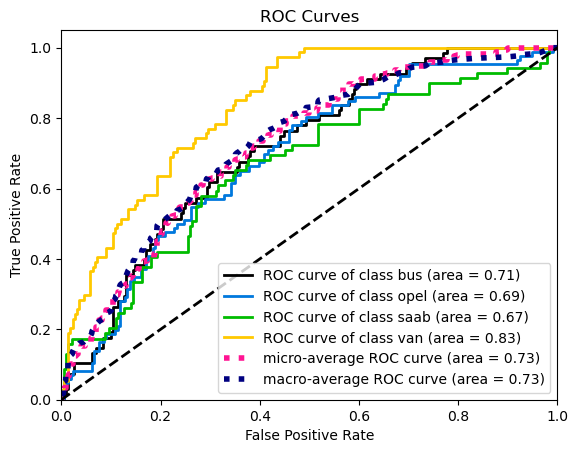

In [21]:
predicted_proba = pipe.predict_proba(X_test)

scikitplot.metrics.plot_roc(y_test, predicted_proba)

Хотя значения ROC AUC выглядят неплохо.
Но количество компонент, все равно увеличу

In [24]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=11)),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500))])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(f"accuracy {accuracy_score(y_test, y_pred)}")
print(f"f1 {f1_score(y_test, y_pred, average='weighted')}")

accuracy 0.6936026936026936
f1 0.685757396369188


Это мне нравится больше)

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

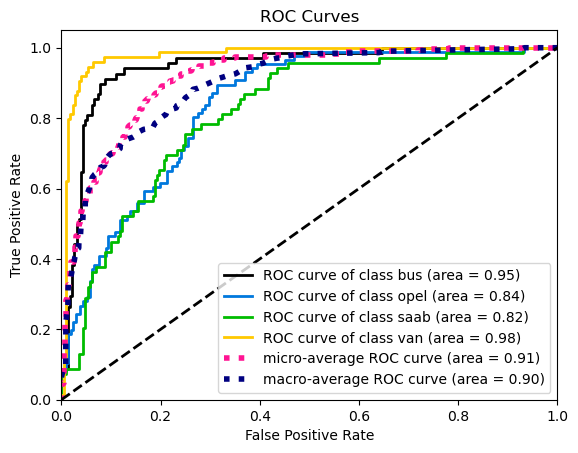

In [25]:
predicted_proba = pipe.predict_proba(X_test)

scikitplot.metrics.plot_roc(y_test, predicted_proba)

Почти ничего не потеряли, а количество компонент, все равно сократили

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [35]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
pipe_tree = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=11)),
    ('classifier', DecisionTreeClassifier())])

prms_grid = {
    'classifier__max_depth' : range(1, 11)
}

grid_search = GridSearchCV(pipe_tree, prms_grid, cv=5)

grid_search.fit(X_train, y_train)

dectree = grid_search.best_estimator_

print(dectree.get_params()['classifier'])

DecisionTreeClassifier(max_depth=9)


Максимальная глубина дерева 9.

In [38]:
y_pred = dectree.predict(X_test)

print(f"accuracy {accuracy_score(y_test, y_pred)}")
print(f"f1 {f1_score(y_test, y_pred, average='weighted')}")

accuracy 0.6296296296296297
f1 0.6321839060934584


Показатели чуть хуже, чем при использовании линейной регрессии 

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

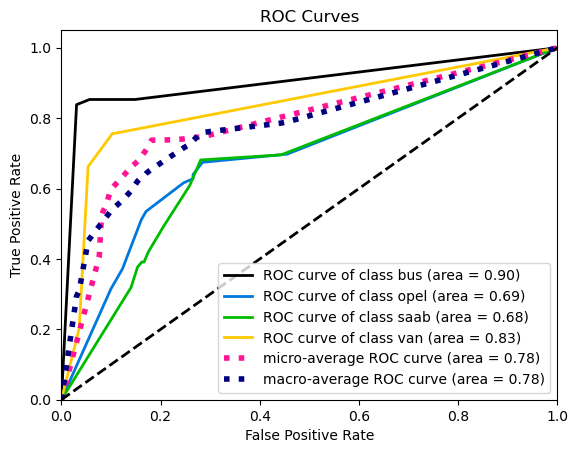

In [39]:
predicted_proba = dectree.predict_proba(X_test)

scikitplot.metrics.plot_roc(y_test, predicted_proba)

In [42]:
depths = range(1, 16) 

for d in depths:
    pipe_tree = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=11)),  
        ('classifier', DecisionTreeClassifier(max_depth=d))
    ])
    
    pipe_tree.fit(X_train, y_train)
    y_pred = pipe_tree.predict(X_test)
    
    print("\n", d)
    print(f"accuracy {accuracy_score(y_test, y_pred)}")
    print(f"f1 {f1_score(y_test, y_pred, average='weighted')}")




 1
accuracy 0.30303030303030304
f1 0.19841744200718558

 2
accuracy 0.43097643097643096
f1 0.35492785885872846

 3
accuracy 0.4781144781144781
f1 0.39972139785597477

 4
accuracy 0.6195286195286195
f1 0.5923078655255354

 5
accuracy 0.622895622895623
f1 0.6111438572988855

 6
accuracy 0.6094276094276094
f1 0.6108935093609904

 7
accuracy 0.6430976430976431
f1 0.6441164740360709

 8
accuracy 0.6296296296296297
f1 0.6310740037150788

 9
accuracy 0.632996632996633
f1 0.6344497728639086

 10
accuracy 0.6195286195286195
f1 0.6228685165859356

 11
accuracy 0.6161616161616161
f1 0.6162696524360763

 12
accuracy 0.632996632996633
f1 0.6355884255937421

 13
accuracy 0.6363636363636364
f1 0.6404083133138585

 14
accuracy 0.6397306397306397
f1 0.6411703470902157

 15
accuracy 0.6464646464646465
f1 0.6468624527005409


ГридСерч подобрал оптимальное значение глубины дерева
Начиная с n=4 показатели уже не сильно меняются

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [84]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

ensemble_sizes = range(2, 100, 5)

logreg_acc, logreg_f1 = [], []

for n_estimators in ensemble_sizes:
    pipe_logreg = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=11)),
        ('bagging', BaggingClassifier(
            LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), 
            n_estimators=n_estimators, 
            n_jobs=-1, 
            random_state=42))
    ])
    pipe_logreg.fit(X_train, y_train)
    y_pred_logreg = pipe_logreg.predict(X_test)

    logreg_acc.append(accuracy_score(y_test, y_pred_logreg))
    logreg_f1.append(f1_score(y_test, y_pred_logreg, average='weighted'))




In [85]:
tree_acc, tree_f1 = [], []

for n_estimators in ensemble_sizes:
    pipe_tree = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=11)),
        ('bagging', BaggingClassifier(
            DecisionTreeClassifier(max_depth=9), 
            n_estimators=n_estimators, 
            n_jobs=-1, 
            random_state=42))
    ])
    pipe_tree.fit(X_train, y_train)
    y_pred_tree = pipe_tree.predict(X_test)

    tree_acc.append(accuracy_score(y_test, y_pred_tree))
    tree_f1.append(f1_score(y_test, y_pred_tree, average='weighted'))

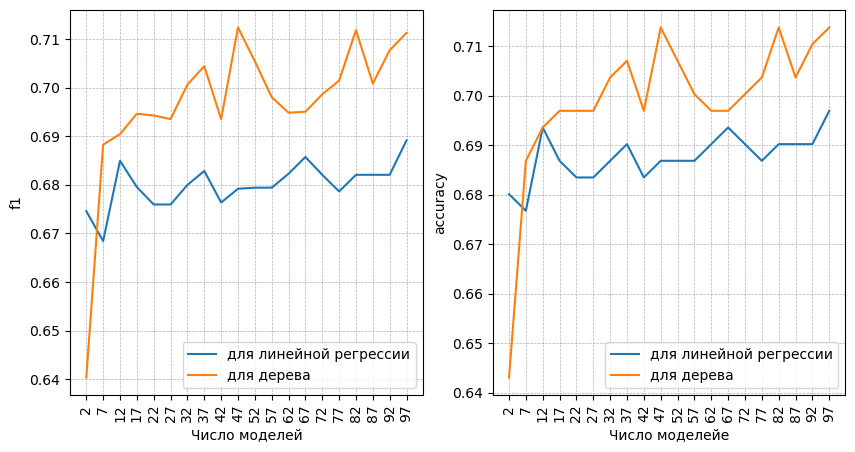

In [86]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ensemble_sizes, logreg_f1, label='для линейной регрессии')
plt.plot(ensemble_sizes, tree_f1, label='для дерева')

plt.xlabel('Число моделей')
plt.ylabel('f1')
plt.legend()
plt.xticks(np.arange(2, 100, 5), rotation=90)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)

plt.plot(ensemble_sizes, logreg_acc, label='для линейной регрессии')
plt.plot(ensemble_sizes, tree_acc, label='для дерева')
plt.xlabel('Число моделейe')
plt.ylabel('accuracy')
plt.legend()
plt.xticks(np.arange(2, 100, 5), rotation=90)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

Если судить по графикам, то вцелом, модели с ипользованием деревьев показли себя получше.

В обоих случаях при числе моделей = 12, показатели метрик колеблятся на одном уровне. Будем считать его оптимальным.

Гиперпараметр глубины дерева, который мы нашли в предыдущем пунтке, впринципе, исходя из графика, можно использовать в ансамбле, т.к. колебания не слишком сильные.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [89]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
forest_acc, forest_f1 = [], []

for n_estimators in ensemble_sizes:
    pipe_tree = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=11)),
        ('forest', RandomForestClassifier(
            n_estimators=n_estimators, 
            n_jobs=-1, 
            random_state=42))
    ])
    pipe_tree.fit(X_train, y_train)
    y_pred_tree = pipe_tree.predict(X_test)

    forest_acc.append(accuracy_score(y_test, y_pred_tree))
    forest_f1.append(f1_score(y_test, y_pred_tree, average='weighted'))

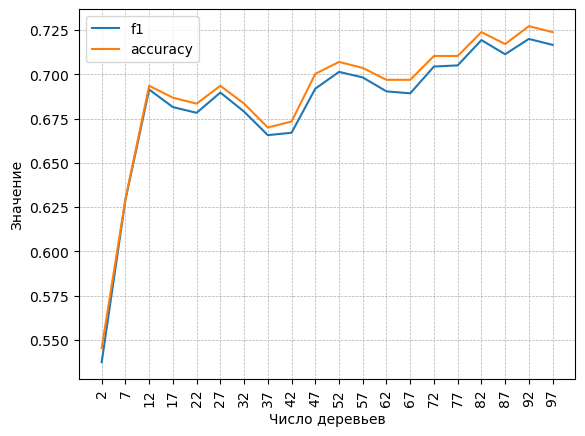

In [90]:
plt.plot(ensemble_sizes, forest_f1, label='f1')
plt.plot(ensemble_sizes, forest_acc, label='accuracy')

plt.xlabel('Число деревьев')
plt.ylabel('Значение')
plt.legend()
plt.xticks(np.arange(2, 100, 5), rotation=90)  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.show()

С увеличением числа деревьев значения метрик, вцелом, улучшается. Оптимальный, по графике, кажется значение около 50 деревьев в лесу.

Здесь оптимальное число выросло относительно предыдущих ансамблей, возможно, это произошло из-за того, что случайный лес берет случайные выборки в случайном порядке, делая эти выборки максимально различными, что помогает бороться с переобучением.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [95]:
# YOUR CODE HERE

n_parts = 10
X_train_parts = np.array_split(X_train, n_parts)
y_train_parts = np.array_split(y_train, n_parts)

logreg_acc, logreg_f1 = [], []
tree_acc, tree_f1 = [], []
forest_acc, forest_f1 = [], []


for i in range(1, n_parts + 1):
    X_train_subset = np.vstack(X_train_parts[:i])
    y_train_subset = np.hstack(y_train_parts[:i])
    
    pipe_logreg = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=11)),
        ('bagging', BaggingClassifier(
            LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500), 
            n_estimators=12,
            n_jobs=-1, 
            random_state=42))
    ])
    pipe_logreg.fit(X_train_subset, y_train_subset)
    y_pred_logreg = pipe_logreg.predict(X_test)

    logreg_acc.append(accuracy_score(y_test, y_pred_logreg))
    logreg_f1.append(f1_score(y_test, y_pred_logreg, average='weighted'))

    pipe_tree = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=11)),
        ('bagging', BaggingClassifier(
            DecisionTreeClassifier(max_depth=9), 
            n_estimators=12, 
            n_jobs=-1, 
            random_state=42))
    ])
    pipe_tree.fit(X_train_subset, y_train_subset)
    y_pred_tree = pipe_tree.predict(X_test)

    tree_acc.append(accuracy_score(y_test, y_pred_tree))
    tree_f1.append(f1_score(y_test, y_pred_tree, average='weighted'))

    pipe_forest = Pipeline([
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=11)),
        ('rf', RandomForestClassifier(
            n_estimators=50,
            random_state=42))
    ])
    pipe_forest.fit(X_train_subset, y_train_subset)
    y_pred_forest = pipe_forest.predict(X_test)

    forest_acc.append(accuracy_score(y_test, y_pred_forest))
    forest_f1.append(f1_score(y_test, y_pred_forest, average='weighted'))

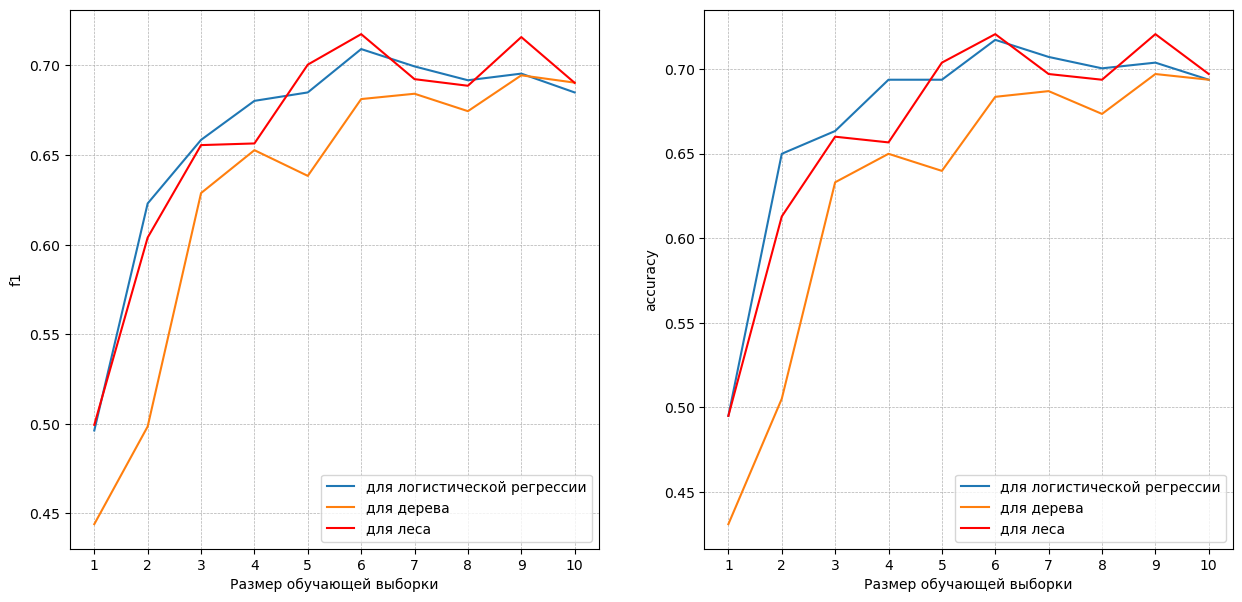

In [103]:
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.plot(range(1, n_parts + 1), logreg_f1, label='для логистической регрессии')
plt.plot(range(1, n_parts + 1), tree_f1, label='для дерева')
plt.plot(range(1, n_parts + 1), forest_f1, label='для леса', color='red')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('f1')
plt.legend()
plt.xticks(np.arange(1, 11))  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.subplot(1, 2, 2)
plt.plot(range(1, n_parts + 1), logreg_acc, label='для логистической регрессии')
plt.plot(range(1, n_parts + 1), tree_acc, label='для дерева')
plt.plot(range(1, n_parts + 1), forest_acc, label='для леса', color='red')
plt.xlabel('Размер обучающей выборки')
plt.ylabel('accuracy')
plt.legend()
plt.xticks(np.arange(1, 11))  
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

По мере увеличения объема данных, показатели метрик растут. Но, в целом, половины набора уже будет достаточно.

Если судить по графику, хуже всего оказалась модель с деревьями решений. Возможно, нужно еще поиграться с оптимальным параметром.

Лес и линейная регресия показали более эффективные и близкие результаты, но все же лес лучше.

В ходе работы поэксперементировали с тремя моделями машиного обучения для классификации, подобрали оптимальные гиперпараметры и изучили, как они влиляют на модели.

Было интересно)